In [4]:
import pandas as pd
import torch

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
# model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")
# import esm
import scipy
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

import seaborn as sns

from sklearn.metrics import r2_score
import joblib
import warnings

from os import listdir
from os.path import isfile, join

In [92]:
try:
    # if this notebook is being called by another one
    # used passed gene_name value
    gene_name
except:
    # otherwise, set value to amacGFP / avGFP / cgreGFP / ppluGFP,
    # for instance for debugging here
    gene_name="avGFP"

recompute=False
recompute_ESM=False
# True: retrain all models
# False: try loading saved models, otherwise retrain models

Import modules
Define functions
Load avGFP data
avGFP 239 aa


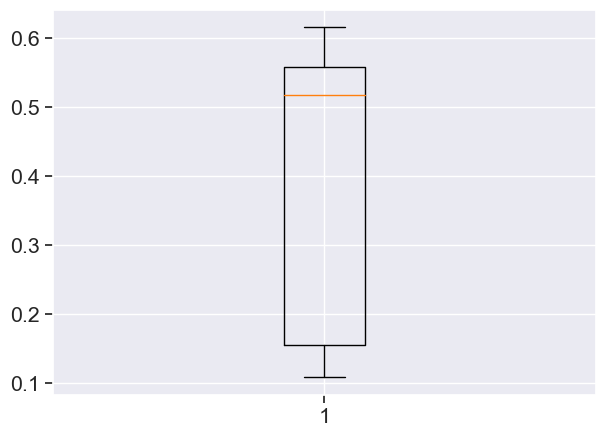

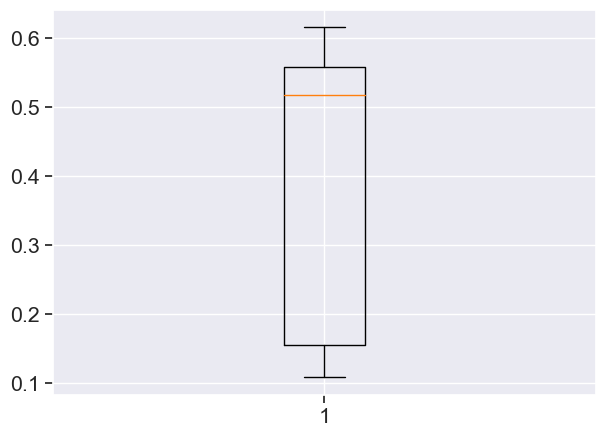

Pre-processing avGFP
Load avGFP encodings
Split train, valid, test sets
train_index 31029
valid_index 10343
test_index 10343


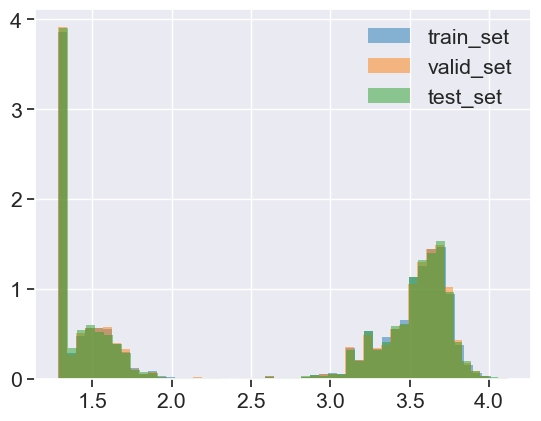

In [120]:
showmatrix=False
threshold_df = ''
%run 01_preprocessing.ipynb

In [121]:
predictors=pd.read_csv(r'D:\Bea\avGFP_ESMpredictors_total.csv')
predictors.reset_index(inplace=True, drop=True)
predictors.drop(columns='Unnamed: 0',inplace=True)

In [122]:
def evaluate_sequences(embeddings_folder):
    
    onlyfiles = [f for f in listdir(embeddings_folder) if isfile(join(embeddings_folder, f))]
    
    return


def spearman_score(y_test_true, y_test_pred):
    r2,_ = scipy.stats.spearmanr(y_test_true, y_test_pred)
    return r2


def correlation_plot(y_train, y_train_pred, y_test, y_pred,r2_det,r2_spearm,fig_name):
    plt.plot()
    
    plt.rcParams.update({'font.size': 14})
    plt.scatter(y_train, y_train_pred, c='blue')
    plt.scatter(y_test, y_pred, c='red')
    max_ = int(max(max(y_test), max(y_pred), max(y_train), max(y_train_pred)))
    # plt.title("Decision Tree Regressor model of " +
    #           metric_name )
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    # plt.legend(['Training data', 'Testing data'], loc="lower right", 
    #            fontsize=20)
    x_line = np.linspace(0,max_, 100)
    y_line = x_line
    plt.plot(x_line, y_line, '-r', label='y=x', c='black')
    plt.xticks(list(range(0,max_)), list(range(0,max_)))
    plt.yticks(list(range(0,max_)), list(range(0,max_)))
    plt.figtext(
        .15, 0.75, f"R2: {round(r2_det,3)}")
    plt.figtext(
        .15, 0.55, f"R2 Spearman: {round(r2_spearm,3)}")
    plt.savefig(embeddings_folder+ '//' + fig_name + '_r2.pdf')
    plt.close()
    print('PLOTTED')
    

In [123]:
predictors_names = predictors['aaMutations']

In [124]:
X = predictors.drop('aaMutations', axis=1)
X

0         1         2         3         4         5         6  \
0      0.004420 -0.010806 -0.039352 -0.004249 -0.080919 -0.018824 -0.039308   
1      0.013414  0.005480 -0.024966  0.007041 -0.084338 -0.009175 -0.039329   
2     -0.004498 -0.004762 -0.049193 -0.009528 -0.094472 -0.007792 -0.029339   
3      0.013743 -0.003611 -0.027229  0.010028 -0.089830 -0.005264 -0.040026   
4      0.009904 -0.006905 -0.031065 -0.005074 -0.083564 -0.018463 -0.039464   
...         ...       ...       ...       ...       ...       ...       ...   
51710  0.005575 -0.009617 -0.034236 -0.001236 -0.086473 -0.019616 -0.032684   
51711  0.003160 -0.014020 -0.038566 -0.000342 -0.086004 -0.016294 -0.040385   
51712  0.011072 -0.009971 -0.038365 -0.003960 -0.073947 -0.022506 -0.032816   
51713 -0.008275 -0.010086 -0.051515 -0.021569 -0.091886 -0.028355 -0.030329   
51714  0.007549 -0.016055 -0.039552 -0.005922 -0.072255 -0.023100 -0.037842   

              7         8         9  ...      1270      1271      1272  \
0      0.020152  0.049724 -0.081940  ...  0.146634  0.047349  0.014803   
1      0.009769  0.067250 -0.072266  ...  0.145429  0.039966  0.014756   
2      0.011535  0.064937 -0.070542  ...  0.165463  0.051789  0.012113   
3      0.018508  0.080657 -0.073550  ...  0.145503  0.045153  0.018398   
4      0.011883  0.059924 -0.082874  ...  0.144673  0.044404  0.014219   
...         ...       ...       ...  ...       ...       ...       ...   
51710  0.020444  0.062518 -0.077751  ...  0.145129  0.052969  0.015034   
51711  0.016038  0.051165 -0.081686  ...  0.147561  0.048063  0.013059   
51712  0.012826  0.059133 -0.070292  ...  0.150429  0.053323  0.017938   
51713  0.026899  0.064264 -0.075533  ...  0.157627  0.057820  0.007733   
51714  0.016573  0.048058 -0.082764  ...  0.157300  0.058651  0.016652   

           1273      1274      1275      1276      1277      1278      1279  
0      0.077491 -0.012645  0.109253  0.081489  0.014164 -0.013374 -0.009202  
1      0.081403 -0.024934  0.104580  0.060403  0.008134  0.007964 -0.018587  
2      0.093974 -0.016039  0.118000  0.074705 -0.010761  0.002410 -0.020724  
3      0.083854 -0.021423  0.105398  0.059490  0.002479 -0.010287 -0.010422  
4      0.076938 -0.020277  0.108153  0.072625  0.016760 -0.005951 -0.009509  
...         ...       ...       ...       ...       ...       ...       ...  
51710  0.089065 -0.015429  0.100679  0.070732  0.017503 -0.011338 -0.009888  
51711  0.077378 -0.008303  0.090519  0.077944  0.012362 -0.017925 -0.000320  
51712  0.082343 -0.027753  0.106819  0.076847  0.012376 -0.005664 -0.010424  
51713  0.093188 -0.005243  0.112241  0.086058  0.011568 -0.016701 -0.015416  
51714  0.078160 -0.020932  0.103538  0.071012  0.013095 -0.009778 -0.003201  

[51715 rows x 1280 columns]

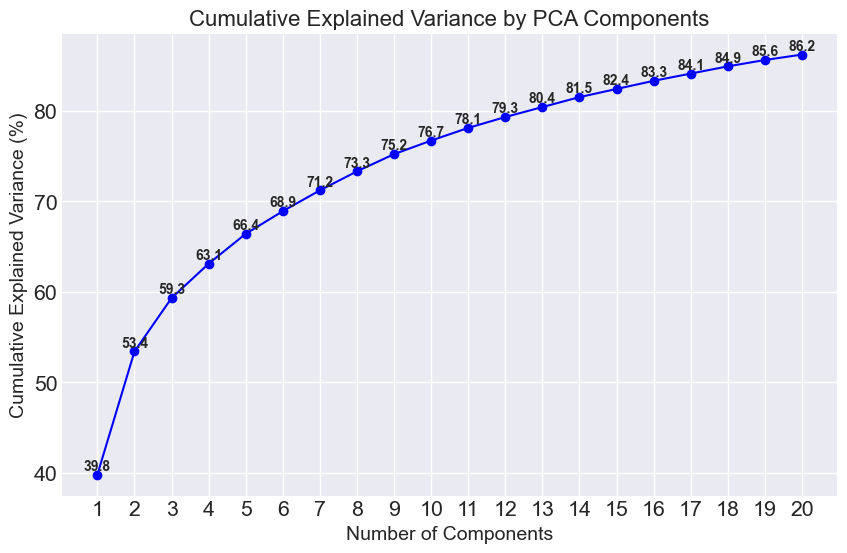

In [112]:

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_pca

variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

# Set a nicer style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), var, marker='o', linestyle='-', color='b')  # Adjust the range to start at 1

# Label the points on the plot
for i, v in enumerate(var):
    plt.text(i + 1, v + 0.5, f"{v:.1f}", ha='center', fontdict={'fontweight':'bold',
                                                                'fontsize':10})  # Adjust the text to match the x-values starting at 1

# Adding title and labels
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=14)

# Set x-ticks
plt.xticks(range(1, 21))  # Set ticks at each integer from 1 to 20

# Show the plot
plt.show()

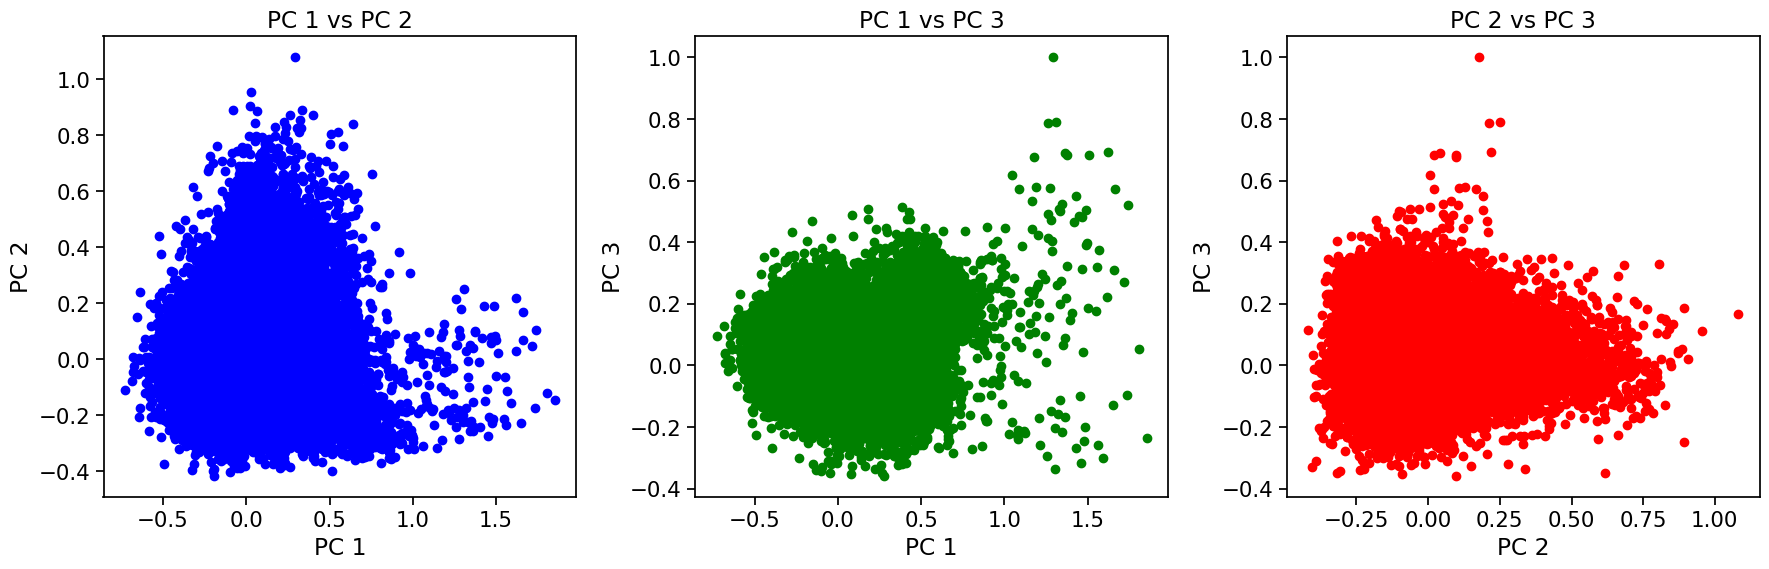

In [103]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(X_pca, columns=['PC 1', 'PC 2', 'PC 3'])

# Create scatter plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Column 1 vs Column 2
ax[0].scatter(df['PC 1'], df['Column 2'], color='blue')
ax[0].set_title('PC 1 vs PC 2')
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')

# Plot 2: Column 1 vs Column 3
ax[1].scatter(df['PC 1'], df['PC 3'], color='green')
ax[1].set_title('PC 1 vs PC 3')
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 3')

# Plot 3: Column 2 vs Column 3
ax[2].scatter(df['PC 2'], df['PC 3'], color='red')
ax[2].set_title('PC 2 vs PC 3')
ax[2].set_xlabel('PC 2')
ax[2].set_ylabel('PC 3')

# Display the plots
plt.tight_layout()
plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'X' is your original high-dimensional data
# X =X.values  # Example: 100 samples with 10 features each

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)  # Using 2 components for visualization
X_tsne = tsne.fit_transform(X)

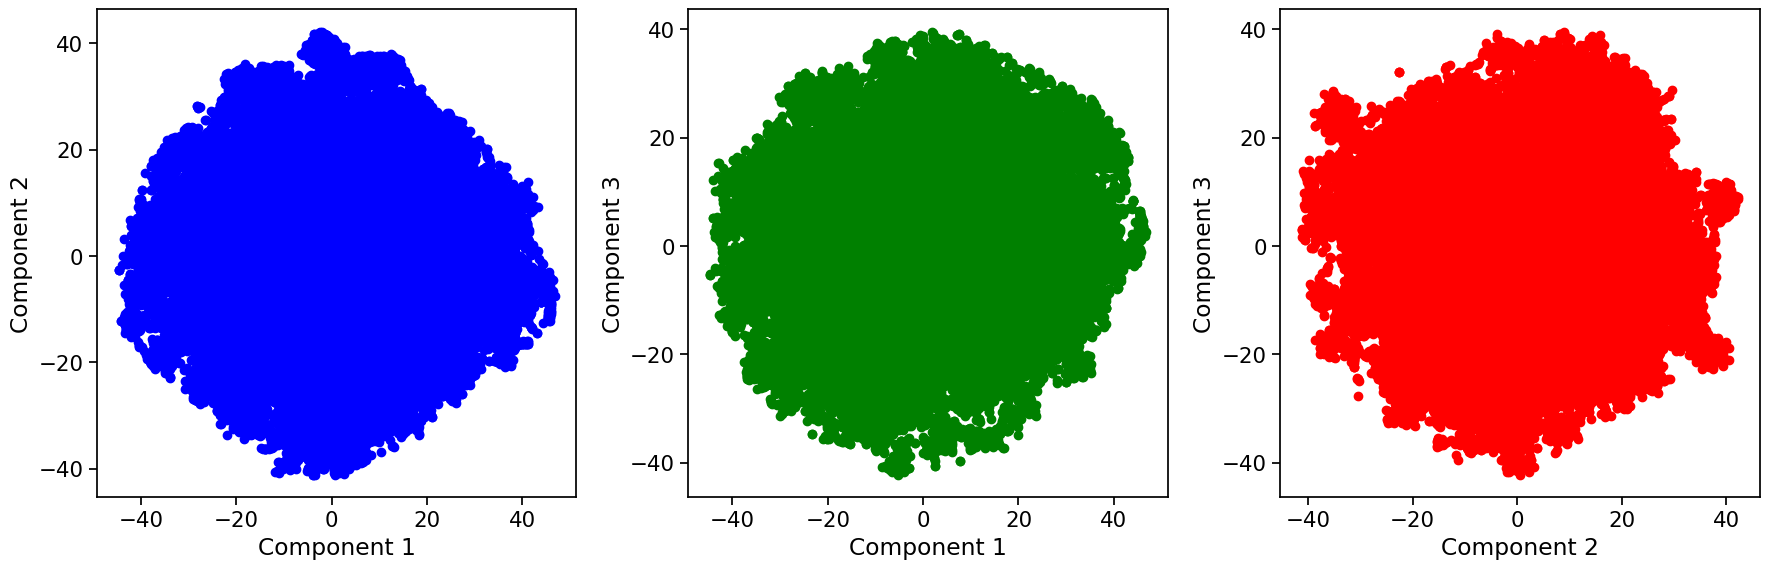

In [106]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(X_tsne, columns=['PC 1', 'PC 2', 'PC 3'])

# Create scatter plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Column 1 vs Column 2
ax[0].scatter(df['PC 1'], df['PC 2'], color='blue')
# ax[0].set_title('PC 1 vs PC 2')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

# Plot 2: Column 1 vs Column 3
ax[1].scatter(df['PC 1'], df['PC 3'], color='green')
# ax[1].set_title('PC 1 vs PC 3')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 3')

# Plot 3: Column 2 vs Column 3
ax[2].scatter(df['PC 2'], df['PC 3'], color='red')
# ax[2].set_title('PC 2 vs PC 3')
ax[2].set_xlabel('Component 2')
ax[2].set_ylabel('Component 3')

# Display the plots
plt.tight_layout()
plt.show()

In [30]:
X.values


array([[ 0.0044202 , -0.01080558, -0.03935178, ...,  0.01416407,
        -0.01337424, -0.00920195],
       [ 0.01341417,  0.0054801 , -0.02496603, ...,  0.00813365,
         0.00796391, -0.01858722],
       [-0.00449777, -0.00476235, -0.04919279, ..., -0.01076109,
         0.00241005, -0.02072409],
       ...,
       [ 0.01107214, -0.00997121, -0.03836526, ...,  0.01237588,
        -0.00566446, -0.01042371],
       [-0.00827506, -0.01008579, -0.05151543, ...,  0.0115681 ,
        -0.01670058, -0.01541596],
       [ 0.0075485 , -0.01605476, -0.03955164, ...,  0.01309533,
        -0.00977821, -0.0032009 ]])

In [125]:
parental_index = 0
metric = 'medianBrightness'
# X = X_pca
X= X.values
wt = X[0]

eucl_distance = []
for i in range(len(X)):
    dist = round(np.linalg.norm(X[i]-wt),10)
    eucl_distance.append(dist)
    
    
cos_similarity = []
wt = wt.reshape(1, -1)
for i in range(len(X)):
    
    dist = metrics.pairwise.cosine_similarity(X[i].reshape(1, -1),wt)
    cos_similarity.append(dist[0][0])



KeyError: 'medianBrightness'

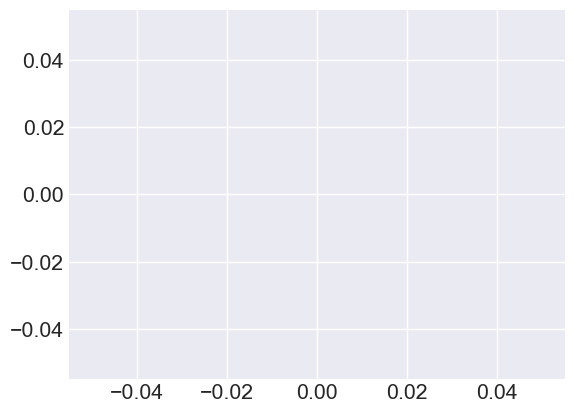

In [117]:

plt.plot()

plt.scatter(eucl_distance, df[metric],  c='blue')
plt.scatter(eucl_distance[parental_index],  df[metric][parental_index],c='red')


plt.ylabel(metric,fontsize=15)
plt.xlabel('Euclidean Distance to Parental',fontsize=15)

plt.show()

plt.plot()

plt.scatter(cos_similarity, df[metric],  c='blue')
plt.scatter(cos_similarity[parental_index],  df[metric][parental_index],c='red')

plt.ylabel(metric,fontsize=15)
plt.xlabel('Cosine Similarity to Parental',fontsize=15)

In [126]:
df

aaMutations  medianBrightness  \
0                                 wt          3.719212   
1                              A109D          1.301030   
2      A109D:N145D:I187V:M232T:L235P          1.301031   
3            A109D:Y142N:H147L:E221G          1.301189   
4                              A109G          3.708478   
...                              ...               ...   
51710               Y91N:N104S:I170F          1.552090   
51711   Y91N:Q176L:L206Q:T229A:M232V          1.301030   
51712               Y91R:I151N:N197S          1.301030   
51713               Y91R:I166T:L235P          1.301517   
51714   Y91S:N104D:K106E:F129L:I151V          1.302130   

                  aa_genotype_pseudo  \
0                                 wt   
1                              A113D   
2      A113D:N149D:I191V:M240T:L243P   
3            A113D:Y146N:H151L:E229G   
4                              A113G   
...                              ...   
51710               Y95N:N108S:I174F   
51711   Y95N:Q180L:L213Q:T237A:M240V   
51712               Y95R:I155N:N204S   
51713               Y95R:I170T:L243P   
51714   Y95S:N108D:K110E:F133L:I155V   

                                                full_seq  
0      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
1      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                  ...  
51710  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
51711  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
51712  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
51713  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
51714  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[51715 rows x 4 columns]

In [127]:
import plotly.express as px
import plotly.graph_objects as go
# Assuming 'df' is your dataframe and 'cos_similarity' is a list or array
# Replace 'metric' with the actual name of the metric column in your dataframe
metric = 'medianBrightness'  # Change this to your specific metric column name
parental_index = 0  # Example index for the special "parental" point

# Create a new column in the dataframe for cosine similarity
df['Cosine Similarity'] = cos_similarity

# Create a scatter plot for all points
fig = px.scatter(df.loc[parental_index+1:], 
                 x='Cosine Similarity',
                   y=metric, 
                   hover_data=['aaMutations'],
                   )

# Add a special marker for the parental point
fig.add_trace(
    go.Scatter(
        x= [df.loc[parental_index,'Cosine Similarity']], 
        y= [df.loc[parental_index,metric]],  
         mode='markers+text',
        marker=dict(color='red', size=8),
        text=["WT"],  # Text label for the parental point
        textposition='top right',
        hovertext=[df.loc[parental_index, 'aaMutations']],
        hoverinfo='text'

    )
)
# Set plot labels
fig.update_layout(
    # title="Cosine Similarity to Parental",
    xaxis_title="Cosine Similarity to WT",
    yaxis_title='log(Brightness)',
    font=dict(size=16),
    # Specify the dimensions of the plot
    width=800,  # Width in pixels
    height=600,  # Height in pixels
    showlegend=False,
)

# Show the plot
fig.show()

